### Урок 11. Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [2]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # метрики
from sklearn.model_selection import train_test_split # разделение данных
from sklearn.datasets import load_boston # встроенный датасет
from sklearn.preprocessing import StandardScaler #z-преобразование

In [2]:
data = pd.read_csv('3.10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [3]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [4]:
def train_polynomial(degree, data):
    """Генерим данные, тренируем модель
    """
    
    X = generate_degrees(data['x_train'], degree)

    model = LinearRegression().fit(X, data['y_train'])
    y_pred = model.predict(X)

    error = r2_score(data['y_train'], y_pred)
    
    return error


In [5]:
err = []
for i in range(1, 11):
   err.append(train_polynomial(i, data))

In [6]:
print ('лучший r2_score = %.3f, степень полинома = %d' % (max(err), err.index(max(err)) + 1) )

лучший r2_score = 0.909, степень полинома = 10


In [7]:
degree = np.linspace(1, 10, 10)

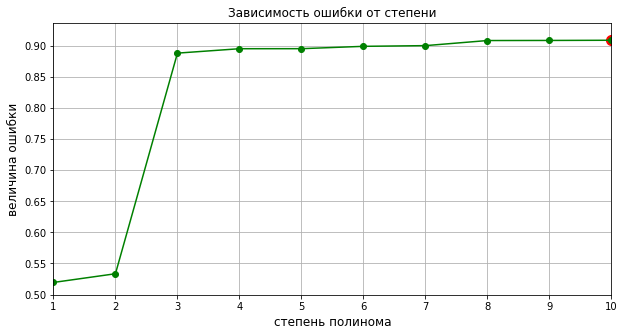

In [26]:
plt.figure(figsize=(10, 5)) 
plt.plot(degree, err, color = 'g', marker = 'o')
plt.scatter(err.index(max(err)) + 1, max(err), 100, color = 'r')
plt.xticks(np.linspace(1,10,10))
plt.xlim(1,10)
plt.xlabel('степень полинома', fontsize=12)
plt.ylabel('величина ошибки', fontsize=12)
plt.title('Зависимость ошибки от степени', fontsize=12)
plt.grid()
plt.show()

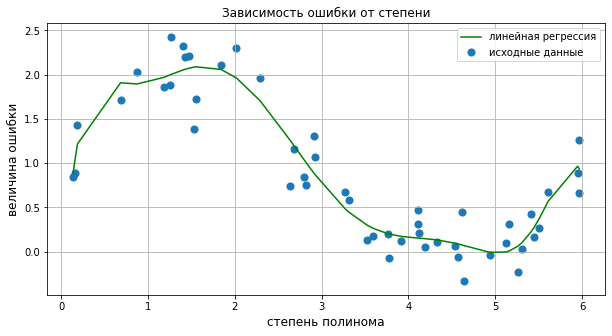

In [9]:
X = generate_degrees(data['x_train'], err.index(max(err)) + 1)

model = LinearRegression().fit(X, data['y_train'])
y_pred = model.predict(X)

plt.figure(figsize=(10, 5)) 
plt.scatter(data['x_train'], data['y_train'], 50, label='исходные данные')
plt.plot(data['x_train'], y_pred, 'g', label='линейная регрессия')
plt.xlabel('степень полинома', fontsize=12)
plt.ylabel('величина ошибки', fontsize=12)
plt.title('Зависимость ошибки от степени', fontsize=12)
plt.legend()
plt.grid()
plt.show()

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [10]:
class CustomLinearReg:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        W = inv ( (X.T).dot(X) ).dot(X.T).dot(Y)
        return W
    
    def predict(self, X, W):       
        return X.dot(W)
        

In [11]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

In [12]:
X=np.ones([len(x_hw),2])

In [13]:
# матрица признаков
for i in range (len(x_hw)):
    X[i][1] = x_hw[i]

In [14]:
# вектор целевых значений
Y = np.array(y_hw)
Y = Y.reshape(-1,1)

In [15]:
coef = CustomLinearReg().fit(X,Y)
coef

array([[-22.5       ],
       [  0.71428571]])

In [16]:
CustomLinearReg().predict(X, coef)

array([[13.21428571],
       [20.35714286],
       [27.5       ],
       [48.92857143]])

In [17]:
CustomLinearReg().predict(np.array([1, 50]), coef)

array([13.21428571])

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [72]:
boston_dataset = load_boston()

x = boston_dataset.data
y = boston_dataset.target

In [83]:
x.shape

(506, 13)

In [84]:
y.shape

(506,)

In [75]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

In [76]:
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_valid)
error = r2_score(y_valid, y_pred)
error

0.5892223849182507

In [77]:
# z-преобразование
x_transformed_data = StandardScaler().fit_transform(x)
y_transformed_data = StandardScaler().fit_transform(y.reshape(-1, 1)).reshape(-1)

In [85]:
x_transformed_data.shape

(506, 13)

In [86]:
y_transformed_data.shape

(506,)

In [87]:
x_train, x_valid, y_train, y_valid = train_test_split(x_transformed_data, y_transformed_data, test_size=0.2, random_state=0)

In [88]:
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_valid)
error = r2_score(y_valid, y_pred)
error

0.5892223849182505

In [82]:
# метрика r2 ухудшилась